In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fish.csv')

# 캐글 생선 데이터 불러오기

In [3]:
# Bream = 도미, Smelt = 빙어
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
# 잊지말자 Pandas에서 distinct()는 unique()!! 총 7마리의 물고기에 대한 데이터이다
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

<function matplotlib.pyplot.show>

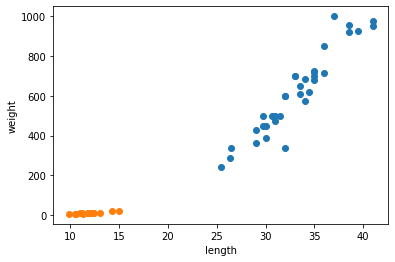

In [20]:
# 가장 구분하기 쉬운 도미 - 빙어 데이터로만 실습

import matplotlib.pyplot as plt

plt.scatter(df.loc[df['Species'] == 'Bream', 'Length2'], df.loc[df['Species'] == 'Bream', 'Weight'])
plt.scatter(df.loc[df['Species'] == 'Smelt', 'Length2'], df.loc[df['Species'] == 'Smelt', 'Weight'])
plt.xlabel('length')
plt.ylabel('weight')
plt.show

# K-최근접 이웃 알고리즘 (K-Nearest Neighbors)

## 도미와 빙어인 경우만 불러와서 2차원 리스트로 만들기

In [3]:
length = df.loc[(df['Species'] == 'Bream') | (df['Species'] == 'Smelt')  , 'Length2'].to_list()
weight = df.loc[(df['Species'] == 'Bream') | (df['Species'] == 'Smelt')  , 'Weight'].to_list()

In [4]:
# 생선의 길이와 무게, 두 개의 값을 한 번에 모델에 넣어주기 위해서 2차원 리스트로 만들 필요가 있음
# zip()은 길이가 같은 n개의 리스트를 말아주고 이것을 슬라이스 할 수 있게 해주는 코드 (dict, tuple, list 형태 모두 가능하다)

fish_data = [[l,w] for l, w in zip(length, weight)]

In [ ]:
# 2차원 리스트 5개만 보여주기

fish_data[:5]

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]

In [5]:
fish_target = df.loc[(df['Species'] == 'Bream') | (df['Species'] == 'Smelt')  , 'Species'].to_list()

In [ ]:
fish_target[-5:]

['Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt']

## 최근접 이웃 알고리즘 요약
* 실제로 학습을 시킨다기 보다는 데이터를 다 저장해두고 (들고) 있다가, 다른 데이터가 입력되었을 때, 들고 있는 데이터들과의 직선 거리를 구해서 어떤 class인지 반환하는 것, 따라서 데이터 양이 엄청 많아지면 사용하기 어렵다
* 디폴트가 가장 가까운 5개와의 거리를 구하는 것이지만, 사용자 마음대로 정할 수도 있다
* 디폴트는 유클리디안거리이고, 'p=' 매개로 맨해튼 거리로 변경할 수 있음 (1로 변경하면 됨)
* 기억하자, fit(), score(), predict()

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
kn = KNeighborsClassifier(p=2)

In [ ]:
kn.fit(fish_data, fish_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# 사이킷런에서 모델을 평가하는 메서드 score()

kn.score(fish_data, fish_target)

1.0

In [ ]:
# length 30, weight 600인 경우는 어떤 생선인지 predict 시키는 것. 이 때, 가장 가까운 데이터 5개와 직선거리를 계산해서 답을 도출하는 것

print(kn.predict([[30,600]]))
print(kn.predict([[12,150]]))

['Bream']
['Smelt']


<function matplotlib.pyplot.show>

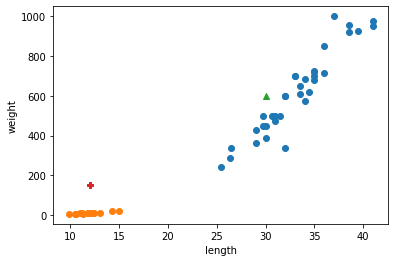

In [ ]:
plt.scatter(df.loc[df['Species'] == 'Bream', 'Length2'], df.loc[df['Species'] == 'Bream', 'Weight'])
plt.scatter(df.loc[df['Species'] == 'Smelt', 'Length2'], df.loc[df['Species'] == 'Smelt', 'Weight'])
plt.scatter(30, 600, marker = '^') # 세모로 표시할 때
plt.scatter(12, 150, marker = 'P') # 플러스(+)로 표시할 때
plt.xlabel('length')
plt.ylabel('weight')
plt.show

In [ ]:
kn49 = KNeighborsClassifier(n_neighbors=49) #총 데이터 개수인 49개를 근접 이웃으로 설정
kn49.fit(fish_data, fish_target)
print(kn49.score(fish_data, fish_target))
print(35/49) # 데이터 중 더 많은 비중을 차지하는 도미로만 판별됨

0.7142857142857143
0.7142857142857143


In [ ]:
# 처음 score가 1 밑으로 내려가는 이웃 숫자 구하기

for i in range (5, 50):
  kn.n_neighbors = i #.n_neighbors는 몇 개의 이웃으로 설정할 것인지 지정해주는 것
  score = kn.score(fish_data, fish_target)
  if score < 1:
    print(i, score)
    break

19 0.9795918367346939


# Test set / Train set 나누기

## 넘파이 배열 활용하여 데이터 전처리하기
* 파이썬 리스트는 큰 데이터를 활용할 때는 속도가 굉장히 느려서, 넘파이 배열로 바꾸는 것이 중요하다

In [8]:
# np.column_stack() 함수는 각 리스트를 세로로 일렬로 세워서 붙여주는 역할을 함

fish_data = np.column_stack((length, weight))

In [9]:
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [10]:
# 파이썬 리스트를 numpy 배열로 바꿔주는 함수 to_numpy

fish_target = df.loc[(df['Species'] == 'Bream') | (df['Species'] == 'Smelt')  , 'Species'].to_numpy()

In [11]:
# 책에서 나온 방법은 아래와 같다. np.concatenate을 써서 한줄의 긴 넘파이 배열을 만들어 주는 것
temp = np.concatenate((np.ones(35), np.zeros(14)))
print(type(fish_target))
print(type(temp))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>



## 사이킷런 train test split
* 디폴트로 test set를 25%로 떼어내준다
* stratify에 타겟 데이터를 지정해주면 동일한 비율로 나누어준다

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# train-test / input-output 순으로 배열 생성
# stratify에 타깃데이터를 전달해서 비율을 일정하게 맞춘다

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state = 42)

In [14]:
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)
type(train_input) #역시 넘파이 배열이다!

(36, 2) (13, 2)
(36,) (13,)


numpy.ndarray

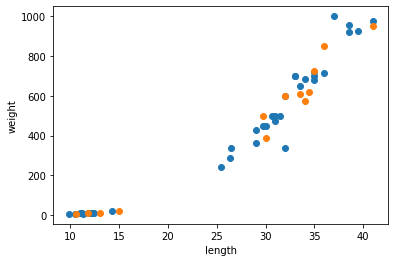

In [21]:
plt.scatter(train_input[:,0], train_input[:,1]) #넘파이 배열 인덱싱은 판다스와 동일
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
#넘파이 배열에서 원하는 것만 불러오려면 슬라이싱 하듯이 [ ] 에 조건을 써준다
print(len(fish_target[fish_target == 'Bream']) / len(fish_target) *100)
print(len(test_target[test_target == 'Bream']) / len(test_target) *100)

In [16]:
kn.fit(train_input, train_target) # KNeighborsClassifer로 fit 해주고
kn.score(test_input, test_target) # score는 test 데이터를 넣어서 도출

1.0

# 근접한 데이터로 결과를 내는 **거리기반 모델링**은 스케일이 중요하다

## 길이 25, 무게 150인 도미로 테스트 해보기
* kn.n_neighbors는 근접 이웃 몇 개를 활용할 것인지, kn.kneighbors는 근접 이웃들과의 거리와 인덱스를 반환
* kneighbors 모델은 맨해튼 / 유클리드 거리를 사용하기 때문에, 축의 범위가 동일하지 않은 경우, 더 넓은 구간의 축에서 멀리 떨어져있으면 가깝지 않다고 판별하게 된다. 따라서 scaling이 필수적임

In [22]:
kn.predict([[25, 150]]) # 빙어로 분류가 된다

array(['Smelt'], dtype=object)

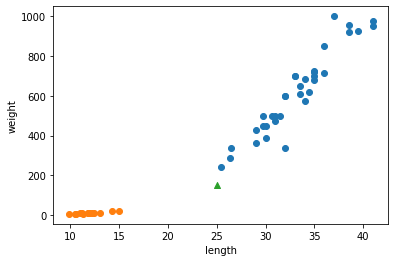

In [23]:
# 근데 막상 그림을 그려보면 도미에 더 가까운 것을 볼 수 있다
plt.scatter(df.loc[df['Species'] == 'Bream', 'Length2'], df.loc[df['Species'] == 'Bream', 'Weight'])
plt.scatter(df.loc[df['Species'] == 'Smelt', 'Length2'], df.loc[df['Species'] == 'Smelt', 'Weight'])
plt.scatter(25, 150, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [24]:
print(kn.kneighbors([[25, 150]]))
distances, indexes = kn.kneighbors([[25, 150]])

(array([[ 92.00086956, 130.73859415, 137.17988191, 138.39320793,
        140.00603558]]), array([[11, 20, 13, 22, 15]]))


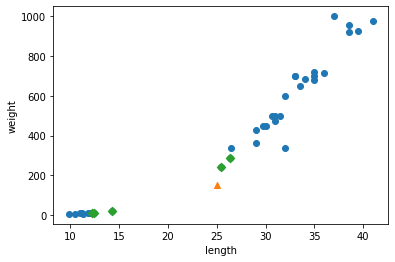

In [25]:
# 위의 그래프를 다시 그려서 25, 150 생선 근처의 이웃들을 확인해보기
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes,0], train_input[indexes, 1], marker='D') #넘파이배열 행 자리에 위의 index를 넣으면 하나씩 빼와서 그려진다
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 세모와 동그라미들이 더 가까움에도, y축에서 많이 차이가 나서 이웃으로 분류되지 않은 것

## 표준점수로 스케일링하기 (Z-Score)
* train set의 평균과 표준편차고 z통계량을 구해주고, test set으로 확인할 때도 역시 같은 값으로 처리해주어야 한다

In [26]:
# length & weight의 평균과 표준편차를 구해줌
mean = np.mean(train_input, axis =0)
std = np.std(train_input, axis=0)
print(mean)
print(std)

[ 26.93333333 441.98333333]
[ 10.09141549 325.61300692]


In [27]:
train_scaled = (train_input - mean) / std

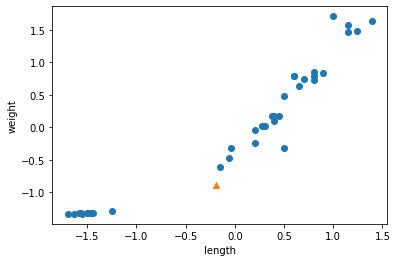

In [28]:
new = ([25,150] - mean) / std #array 형태로 되어 있어도 열 순서에 따라서 알아서 계산해주는데, 이게 브로드캐스팅 (배열 사이에서 일어남)
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [33]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [31]:
# 스케일을 맞춰주기 위한 것이기 때문에 train set의 평균과 표준편차로 맞춰줘야 한다
test_scaled = (test_input - mean)/std

In [34]:
kn.score(test_scaled, test_target)

1.0

In [36]:
kn.predict([new]) #scaling 하지 않았을 때, 빙어에서 현재 도미로 예측 성공!

array(['Bream'], dtype=object)